In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV
from ec4py.util_voltammetry import Voltammetry,find_vertex
import numpy as np
import matplotlib.pyplot as plt
import math


In [2]:
Eup = np.array([(x-100)/100 for x in range(0,201)])
print(Eup)
print(find_vertex(Eup))


[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91 -0.9  -0.89
 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79 -0.78 -0.77
 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.53
 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07
  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0

IndexError: index 201 is out of bounds for axis 0 with size 201

In [ ]:
data.make_E_axis(0,2)
data.make_E_axis(0,2)

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 1.998e+00, 1.999e+00,
       2.000e+00])

In [ ]:
data= Voltammetry(E_min=-5,E_max=5)
print(data.E)
print(data.get_index_of_E(0))
print(data.E[data.get_index_of_E(0)])


[-5.    -4.999 -4.998 ...  4.998  4.999  5.   ]
5000
0.0


0.00011271300716988165


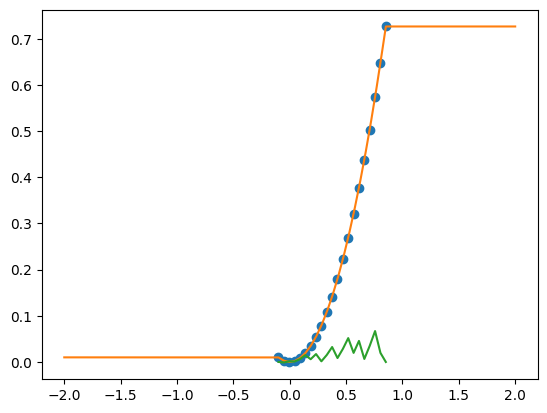

In [ ]:
data= Voltammetry(E_min=-2,E_max=2)
size =21
x = np.array(range(0,size))/size-0.1
y= x**2
aa = data.interpolate(x,y)
error = 0
err=[]
for i in range(size):
    current = aa[data.get_index_of_E(x[i])]
    error = error + (current-y[i])**2
    err.append((current-y[i]))
err =np.array(err)    
rms = math.sqrt(error )/size
print(rms)  
err = err*50
plt.plot(x,y,"o",data.E,aa, x,err)

### integrate

5.000e-01 C


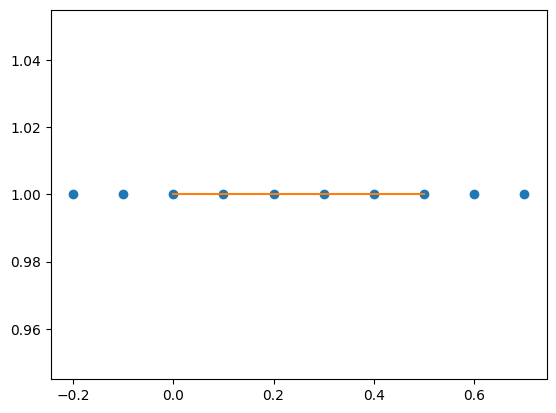

In [ ]:
data= Voltammetry(E_min=-1,E_max=1)
rr= 10
x = np.array(range(0,rr))/10-0.2
y= np.ones(rr)
aa = data.interpolate(x,y)
bb,pl = data._integrate(0,0.5,aa)
print(bb)
plt.plot(x,y,"o",pl[0],pl[1])

In [ ]:
data = Voltammetry(E_min=-2,E_max=2)
testdata=data.E.copy()
print(testdata)
data.set_RHE(0.0)
resultdata = data.set_active_RE("RHE",testdata)
print(resultdata)
resultdata = data.set_active_RE("RHE",testdata)
print(resultdata)


[-2.    -1.999 -1.998 ...  1.998  1.999  2.   ]
(0.0, array([-2.   , -1.999, -1.998, ...,  1.998,  1.999,  2.   ]))
None


In [ ]:
data1 = Voltammetry(E_min=-2,E_max=2)
testdata=data1.E.copy()
print(testdata)
data1.set_RHE(1.0)
resultdata = data1.set_active_RE("RHE",[testdata,testdata])
print(resultdata)


[-2.    -1.999 -1.998 ...  1.998  1.999  2.   ]
(1.0, [array([-1.   , -0.999, -0.998, ...,    nan,    nan,    nan]), array([-1.   , -0.999, -0.998, ...,    nan,    nan,    nan])])
